In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set (style='darkgrid')

## EDA

In [2]:
df_clinic = pd.read_excel('ClinicACov.xlsx')
df_clinic.info()
df_clinic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 101.7+ KB


,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative


In [3]:
df_clinic.describe().round(2)

,TrxNumber,GrandTotal,TotalDiscount,AdminFee,TotalAmount
count,1.000000e+03,1000.00,1000.00,1000.00,1000.00
mean,1.400462e+18,766254.00,3718.65,3632.63,766167.98
std,5.940340e+15,726495.26,29026.43,4236.16,726398.39
min,1.388025e+18,199000.00,0.00,0.00,172000.00
25%,1.395276e+18,398000.00,0.00,2850.00,400850.00
50%,1.398494e+18,597000.00,0.00,2850.00,599850.00
75%,1.406808e+18,796000.00,0.00,2850.00,820477.00
max,1.406998e+18,3596000.00,300000.00,26250.00,3598850.00


In [4]:
df_clinic['TrxMonth'] = df_clinic['OrderCreated'].dt.month
df_clinic['TrxDay'] = df_clinic['OrderCreated'].dt.day
df_clinic['TrxYear'] = df_clinic['OrderCreated'].dt.year
df_clinic['PatientYear'] = df_clinic['PatientBirthDate'].dt.year

In [5]:
df_clinic['PatientAge'] = df_clinic['TrxYear'] - df_clinic['PatientYear']
df_clinic['PatientAge']

0      24
1      24
2      23
3      23
4      34
       ..
995    35
996    35
997    21
998    21
999    21
Name: PatientAge, Length: 1000, dtype: int64

In [6]:
df_clinic.head()

,TrxNumber,TrxType,Branch,Package,PatientBirthDate,PatientGender,PromoCode,GrandTotal,TotalDiscount,AdminFee,TotalAmount,OrderCreated,MedicalResult,TrxMonth,TrxDay,TrxYear,PatientYear,PatientAge
0,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative,5,4,2021,1997,24
1,1389414778136428544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1997-12-11,f,-,199000,0,3000,202000,2021-05-04 10:01:11,Negative,5,4,2021,1997,24
2,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Negative,5,4,2021,1998,23
3,1389442470126813184,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1998-08-17,m,-,199000,0,3000,202000,2021-05-04 11:51:14,Positive,5,4,2021,1998,23
4,1389589423187820544,on ClinicACov stand,ClinicACov Cikarang Selatan,Swab Antigen on ClinicACov stand (Result in 30...,1987-03-06,f,-,199000,0,2850,201850,2021-05-04 21:35:10,Negative,5,4,2021,1987,34


In [7]:
df_clinic['OrderCreated'][999]

Timestamp('2021-06-18 10:28:21')

In [8]:
df_clinic.Package.value_counts()

Swab Antigen on ClinicACov stand (Result in 30Minutes)    852
Swab PCR on ClinicACov stand (Result in 1x24Hours)         88
Swab Antigen Client Home (Result in 30Minutes)             38
Swab PCR Client Home (Result in D+1)                       22
Name: Package, dtype: int64

In [9]:
df_clinic.PromoCode.value_counts()

-                         967
CLINICACOV15               24
ANTIGENCLINICACOVHOME3      9
Name: PromoCode, dtype: int64

In [10]:
df_clinic.PatientGender.value_counts()

m    513
f    487
Name: PatientGender, dtype: int64

In [11]:
df_clinic.Branch.value_counts()

ClinicACov Cikarang Pusat      707
ClinicACov Cikarang Selatan    111
ClinicACov Bekasi Timur         93
ClinicACov Margonda             31
ClinicACov Cileungsi            30
ClinicACov Bekasi Selatan       14
ClinicACov Cibubur              10
ClinicACov Cikarang Utara        4
Name: Branch, dtype: int64

In [12]:
pd.pivot_table(data = df_clinic, 
               values = 'AdminFee', 
               index = ['Package','Branch'], 
               aggfunc = ['min','mean','max','count']).round(2)

min  \
                                                                               AdminFee   
Package                                            Branch                                 
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan       2850   
                                                   ClinicACov Cibubur              2850   
                                                   ClinicACov Margonda             2850   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur            0   
                                                   ClinicACov Cikarang Pusat          0   
                                                   ClinicACov Cikarang Selatan     2850   
                                                   ClinicACov Cileungsi            2850   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan       3000   
                                                   ClinicACov Cikarang Utara       2850   
                                                   ClinicACov Cileungsi            2850   
                                                   ClinicACov Margonda             2850   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur         2850   
                                                   ClinicACov Cikarang Pusat       2850   
                                                   ClinicACov Cikarang Selatan     2850   

                                                                                    mean  \
                                                                                AdminFee   
Package                                            Branch                                  
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan     2978.57   
                                                   ClinicACov Cibubur            2850.00   
                                                   ClinicACov Margonda          12878.57   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur       2813.41   
                                                   ClinicACov Cikarang Pusat     3749.42   
                                                   ClinicACov Cikarang Selatan   2874.09   
                                                   ClinicACov Cileungsi          2850.00   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan     3000.00   
                                                   ClinicACov Cikarang Utara     2850.00   
                                                   ClinicACov Cileungsi          2850.00   
                                                   ClinicACov Margonda           2850.00   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur       2904.55   
                                                   ClinicACov Cikarang Pusat     2880.26   
                                                   ClinicACov Cikarang Selatan   2850.00   

                                                                                    max  \
                                                                               AdminFee   
Package                                            Branch                                 
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan       3000   
                                                   ClinicACov Cibubur              2850   
                                                   ClinicACov Margonda            26250   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur         3000   
                                                   ClinicACov Cikarang Pusat      24477   
                                                   ClinicACov Cikarang Selatan     3850   
                                                   ClinicACov Cileungsi            2850   
Swab PCR Client Home (Result in D+1)               ClinicACov

In [13]:
pd.pivot_table(data = df_clinic, 
               values = 'GrandTotal', 
               index = ['Package','Branch'], 
               aggfunc = ['min','mean','max','count']).round(2)

min  \
                                                                               GrandTotal   
Package                                            Branch                                   
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan       350000   
                                                   ClinicACov Cibubur              350000   
                                                   ClinicACov Margonda             350000   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur         199000   
                                                   ClinicACov Cikarang Pusat       199000   
                                                   ClinicACov Cikarang Selatan     199000   
                                                   ClinicACov Cileungsi            199000   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan      1850000   
                                                   ClinicACov Cikarang Utara      2300000   
                                                   ClinicACov Cileungsi           1150000   
                                                   ClinicACov Margonda            1500000   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur         899000   
                                                   ClinicACov Cikarang Pusat       899000   
                                                   ClinicACov Cikarang Selatan     899000   

                                                                                      mean  \
                                                                                GrandTotal   
Package                                            Branch                                    
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan    1635714.29   
                                                   ClinicACov Cibubur            980000.00   
                                                   ClinicACov Margonda          1059523.81   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur       315487.80   
                                                   ClinicACov Cikarang Pusat     620022.19   
                                                   ClinicACov Cikarang Selatan   318409.09   
                                                   ClinicACov Cileungsi          226448.28   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan    2107142.86   
                                                   ClinicACov Cikarang Utara    2300000.00   
                                                   ClinicACov Cileungsi         1150000.00   
                                                   ClinicACov Margonda          2140000.00   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur      1225909.09   
                                                   ClinicACov Cikarang Pusat    2673342.11   
                                                   ClinicACov Cikarang Selatan   899000.00   

                                                                                      max  \
                                                                               GrandTotal   
Package                                            Branch                                   
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan      1850000   
                                                   ClinicACov Cibubur             1050000   
                                                   ClinicACov Margonda            1500000   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur         597000   
                                                   ClinicACov Cikarang Pusat      1194000   
                                                   ClinicACov Cikarang Selatan     597000   
                                                   ClinicACov Cileun

In [88]:
df_clinic['GrandTotal'].unique()

array([ 199000,  796000,  398000,  899000, 1850000,  597000, 2697000,
       1798000, 1050000, 1500000, 2300000, 3596000,  995000, 1150000,
        350000,  200000, 1194000], dtype=int64)

In [14]:
pd.pivot_table(data = df_clinic, 
               values = 'TotalAmount', 
               index = ['Package','Branch'], 
               aggfunc = ['min','mean','max','count']).round(2)

min  \
                                                                               TotalAmount   
Package                                            Branch                                    
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan        352850   
                                                   ClinicACov Cibubur               352850   
                                                   ClinicACov Margonda              352850   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur          172000   
                                                   ClinicACov Cikarang Pusat        172000   
                                                   ClinicACov Cikarang Selatan      172000   
                                                   ClinicACov Cileungsi             172000   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan       1853000   
                                                   ClinicACov Cikarang Utara       2302850   
                                                   ClinicACov Cileungsi            1152850   
                                                   ClinicACov Margonda             1502850   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur          851850   
                                                   ClinicACov Cikarang Pusat        851850   
                                                   ClinicACov Cikarang Selatan      901850   

                                                                                      mean  \
                                                                               TotalAmount   
Package                                            Branch                                    
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan    1638692.86   
                                                   ClinicACov Cibubur            982850.00   
                                                   ClinicACov Margonda           943830.95   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur       317209.15   
                                                   ClinicACov Cikarang Pusat     622963.84   
                                                   ClinicACov Cikarang Selatan   320469.09   
                                                   ClinicACov Cileungsi          228268.97   
Swab PCR Client Home (Result in D+1)               ClinicACov Bekasi Selatan    2110142.86   
                                                   ClinicACov Cikarang Utara    2302850.00   
                                                   ClinicACov Cileungsi         1152850.00   
                                                   ClinicACov Margonda          2142850.00   
Swab PCR on ClinicACov stand (Result in 1x24Hours) ClinicACov Bekasi Timur      1210631.82   
                                                   ClinicACov Cikarang Pusat    2674906.58   
                                                   ClinicACov Cikarang Selatan   901850.00   

                                                                                       max  \
                                                                               TotalAmount   
Package                                            Branch                                    
Swab Antigen Client Home (Result in 30Minutes)     ClinicACov Bekasi Selatan       1853000   
                                                   ClinicACov Cibubur              1052850   
                                                   ClinicACov Margonda             1502850   
Swab Antigen on ClinicACov stand (Result in 30M... ClinicACov Bekasi Timur          599850   
                                                   ClinicACov Cikarang Pusat       1196850   
                                                   ClinicACov Cikarang Selatan      599850   
                                           

In [15]:
df_clinic.groupby(['PatientGender','MedicalResult']).size()

PatientGender  MedicalResult
f              Negative         450
               Positive          37
m              Negative         477
               Positive          36
dtype: int64

In [16]:
df_clinic.groupby(['PatientGender']).mean().round(2)[['GrandTotal','TotalDiscount','AdminFee','TotalAmount']]

,GrandTotal,TotalDiscount,AdminFee,TotalAmount
PatientGender,,,,
f,739597.54,4476.08,3422.92,738544.38
m,791559.45,2999.61,3831.71,792391.55


array([[<AxesSubplot:title={'center':'TrxNumber'}>,
        <AxesSubplot:title={'center':'PatientBirthDate'}>,
        <AxesSubplot:title={'center':'GrandTotal'}>],
       [<AxesSubplot:title={'center':'TotalDiscount'}>,
        <AxesSubplot:title={'center':'AdminFee'}>,
        <AxesSubplot:title={'center':'TotalAmount'}>],
       [<AxesSubplot:title={'center':'OrderCreated'}>,
        <AxesSubplot:title={'center':'TrxMonth'}>,
        <AxesSubplot:title={'center':'TrxDay'}>],
       [<AxesSubplot:title={'center':'TrxYear'}>,
        <AxesSubplot:title={'center':'PatientYear'}>,
        <AxesSubplot:title={'center':'PatientAge'}>]], dtype=object)

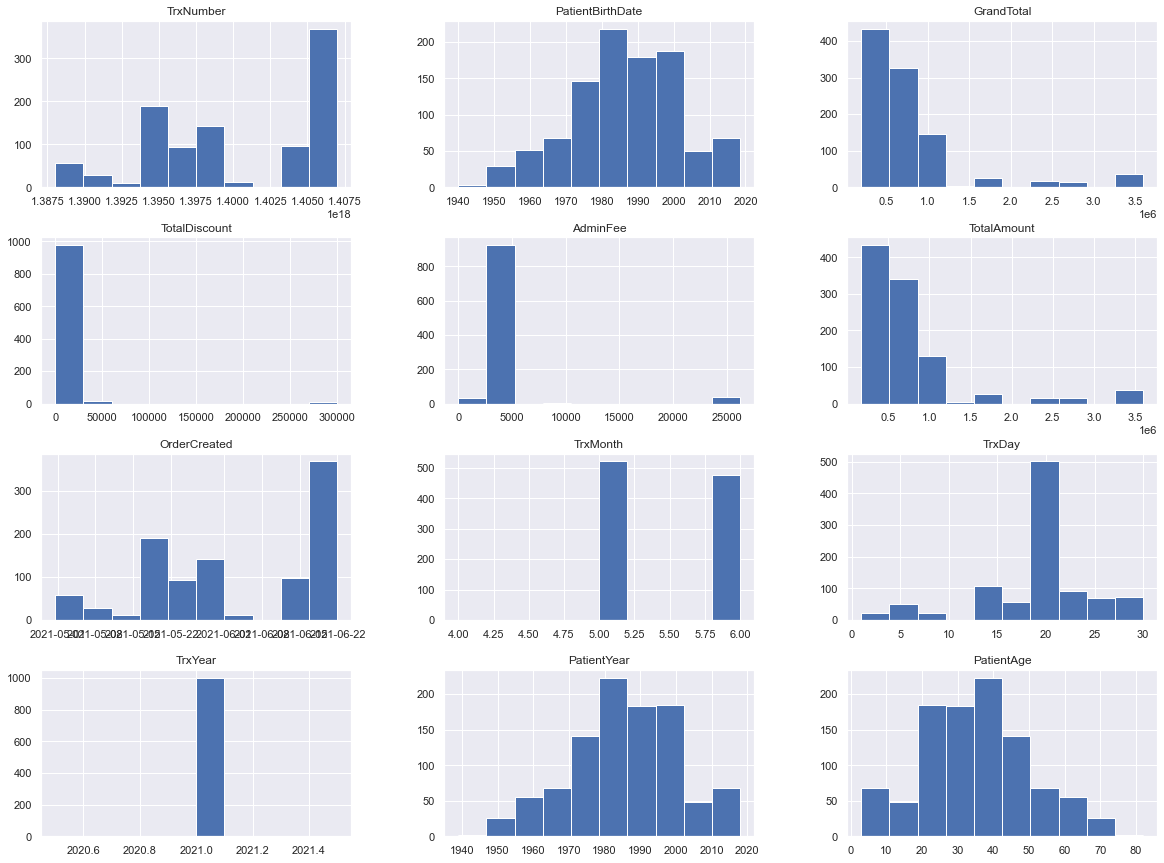

In [17]:
df_clinic.hist(figsize=(20,15))

## Data Cleaning

### Data Duplicates

In [18]:
df_clinic.duplicated().any()

True

In [19]:
#df_clinic.drop_duplicates(inplace=True, ignore_index = True)

In [20]:
df_clinic.duplicated().any()

True

In [21]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
 13  TrxMonth          1000 non-null   int64         
 14  TrxDay            1000 no

### Missing Values

In [22]:
df_clinic.isna().sum()

TrxNumber           0
TrxType             0
Branch              0
Package             0
PatientBirthDate    0
PatientGender       0
PromoCode           0
GrandTotal          0
TotalDiscount       0
AdminFee            0
TotalAmount         0
OrderCreated        0
MedicalResult       0
TrxMonth            0
TrxDay              0
TrxYear             0
PatientYear         0
PatientAge          0
dtype: int64

### Data Outliers

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrandTotal'>

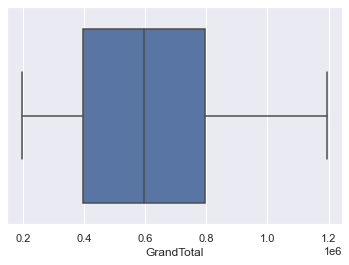

In [23]:
sns.boxplot(df_clinic['GrandTotal'], showfliers=False)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalDiscount'>

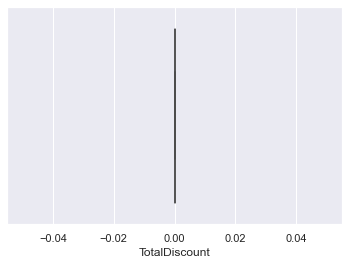

In [24]:
sns.boxplot(df_clinic['TotalDiscount'], showfliers=False)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AdminFee'>

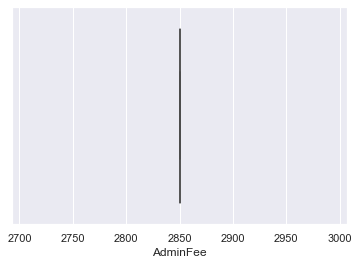

In [25]:
sns.boxplot(df_clinic['AdminFee'], showfliers=False)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalAmount'>

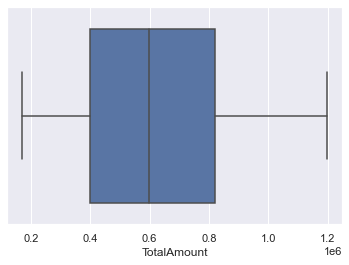

In [26]:
sns.boxplot(df_clinic['TotalAmount'], showfliers=False)

## Data Visualization

In [27]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
 13  TrxMonth          1000 non-null   int64         
 14  TrxDay            1000 no

<AxesSubplot:xlabel='MedicalResult', ylabel='count'>

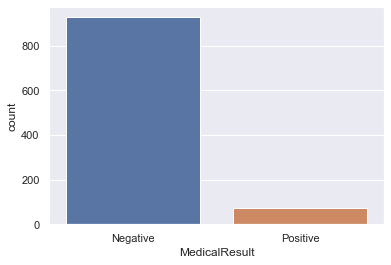

In [28]:
sns.countplot(data = df_clinic, x = 'MedicalResult')

<AxesSubplot:xlabel='Package', ylabel='count'>

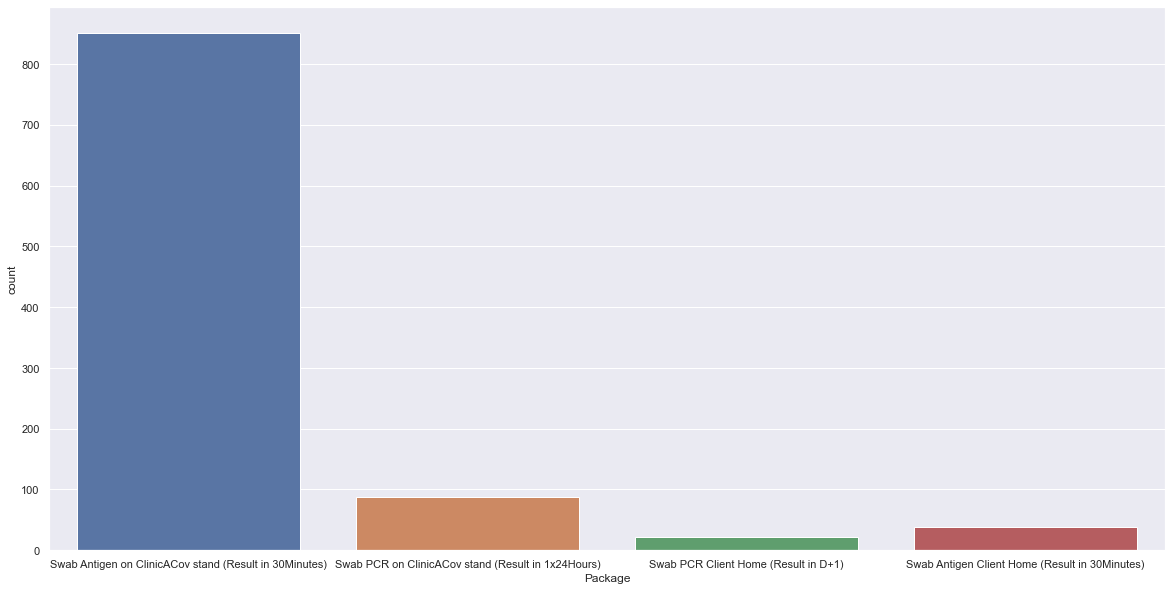

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_clinic, x = 'Package')

<AxesSubplot:xlabel='Branch', ylabel='count'>

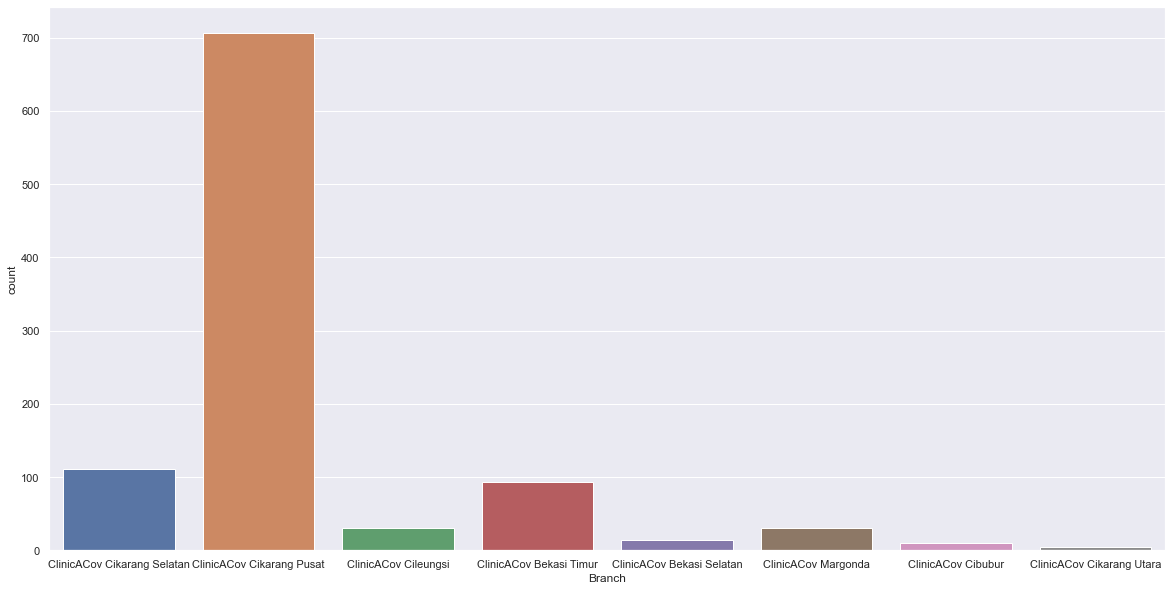

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_clinic, x = 'Branch')

<AxesSubplot:xlabel='TrxMonth', ylabel='count'>

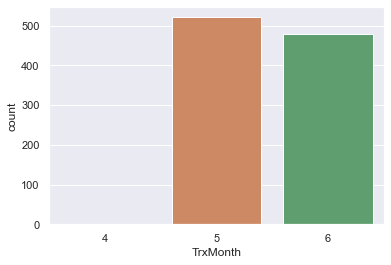

In [31]:
sns.countplot(data = df_clinic, x = 'TrxMonth')

<AxesSubplot:xlabel='PatientGender', ylabel='count'>

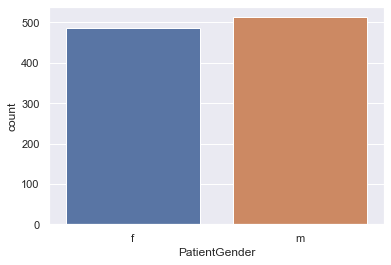

In [32]:
sns.countplot(data = df_clinic, x = 'PatientGender')

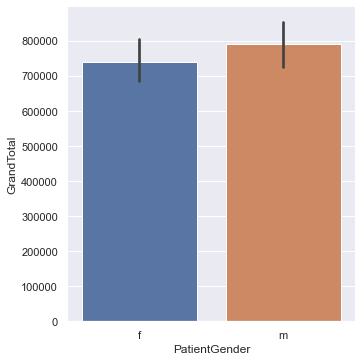

In [33]:
sns.catplot(data = df_clinic, x = 'PatientGender', y = 'GrandTotal', kind= 'bar')

<AxesSubplot:xlabel='PatientGender', ylabel='count'>

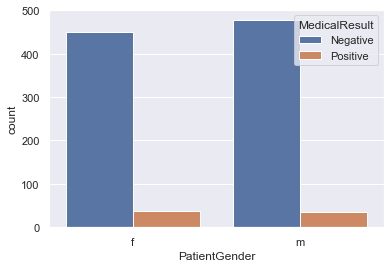

In [34]:
sns.countplot(data = df_clinic, x = 'PatientGender',hue = 'MedicalResult')

<AxesSubplot:xlabel='PatientAge', ylabel='count'>

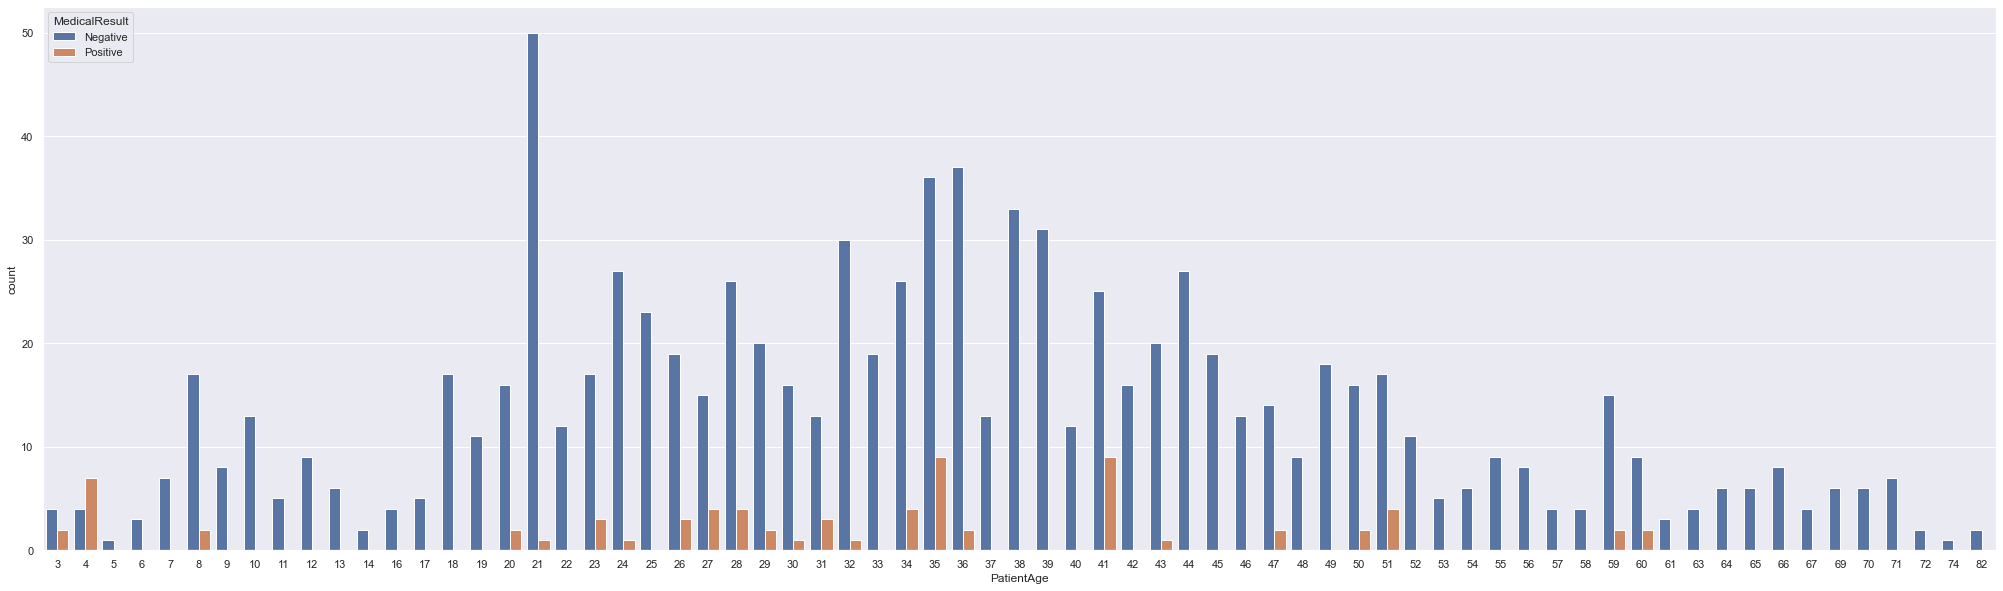

In [35]:
plt.figure(figsize=(35,10))
sns.countplot(data = df_clinic, x = 'PatientAge',hue = 'MedicalResult')

<AxesSubplot:xlabel='Package', ylabel='AdminFee'>

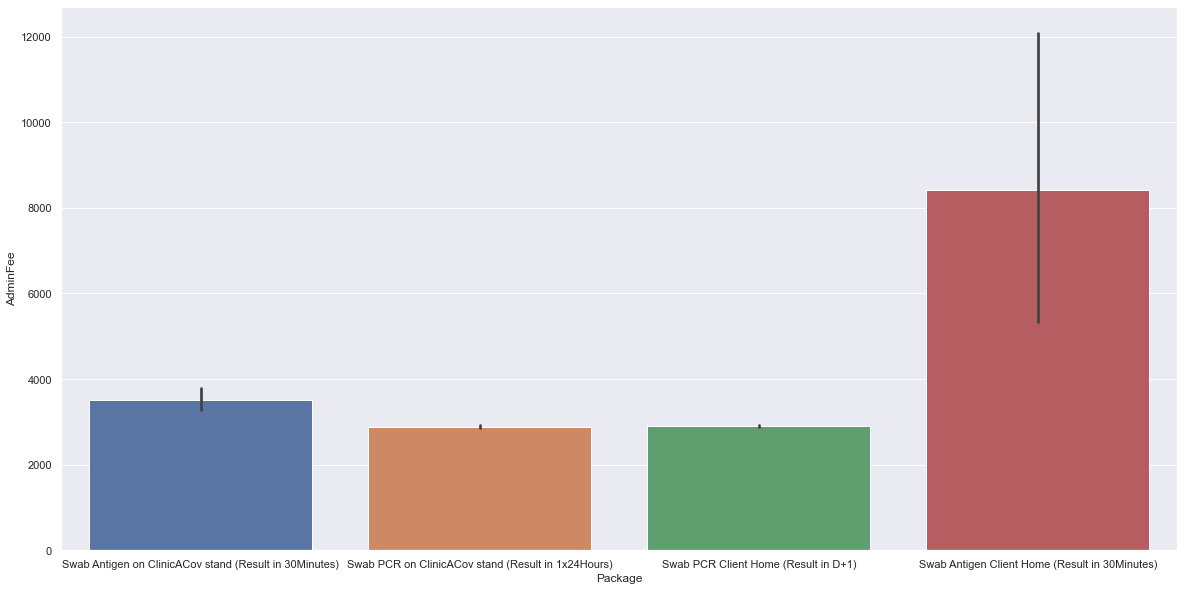

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_clinic, x = 'Package', y = 'AdminFee')

<AxesSubplot:xlabel='PatientAge', ylabel='GrandTotal'>

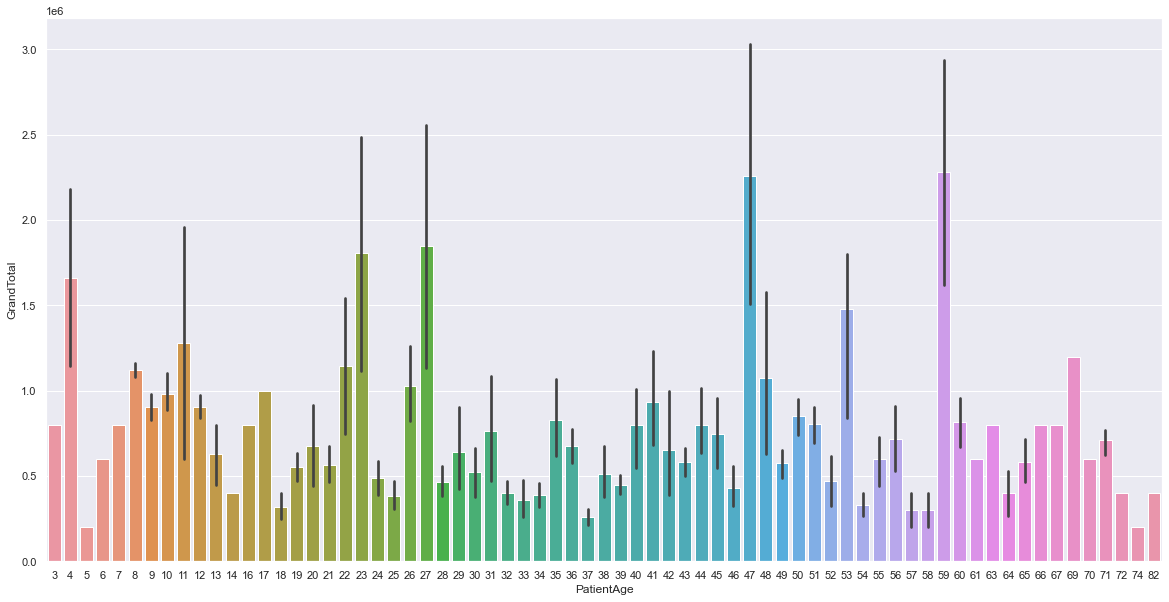

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_clinic, x = 'PatientAge', y = 'GrandTotal')

<AxesSubplot:xlabel='Package', ylabel='GrandTotal'>

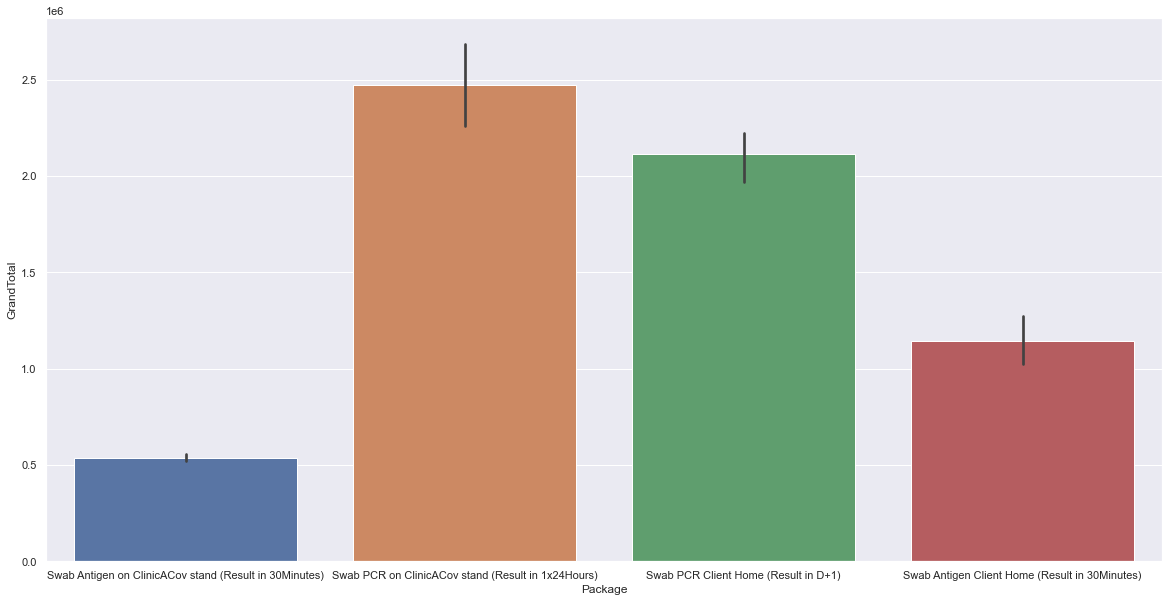

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_clinic, x = 'Package', y = 'GrandTotal')

<AxesSubplot:xlabel='Branch', ylabel='GrandTotal'>

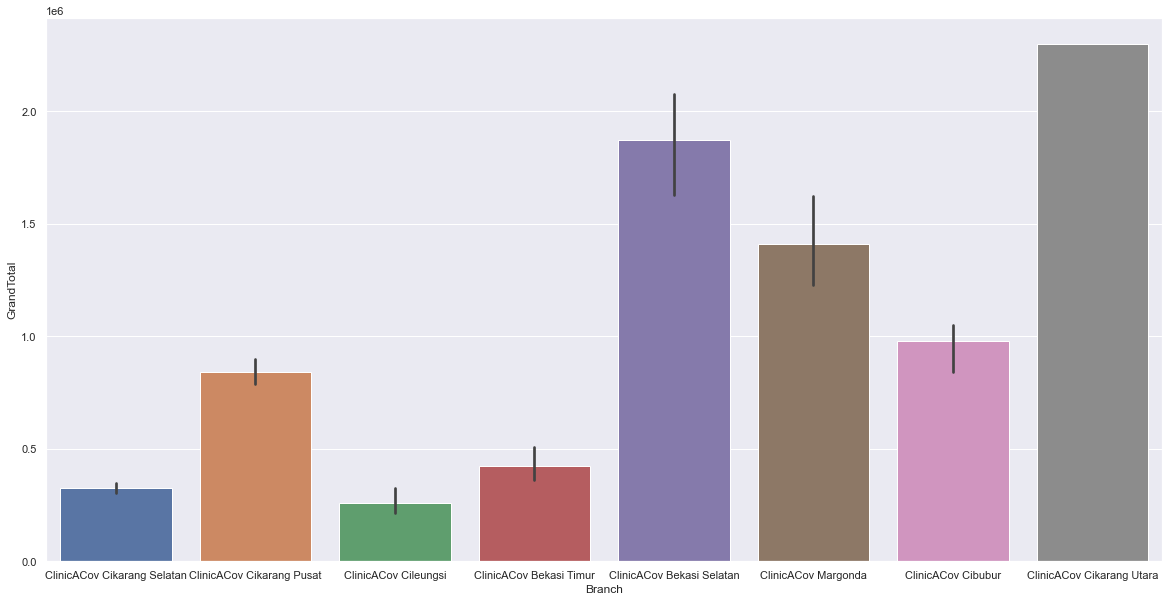

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_clinic, x = 'Branch', y = 'GrandTotal')

<AxesSubplot:xlabel='TrxDate', ylabel='GrandTotal'>

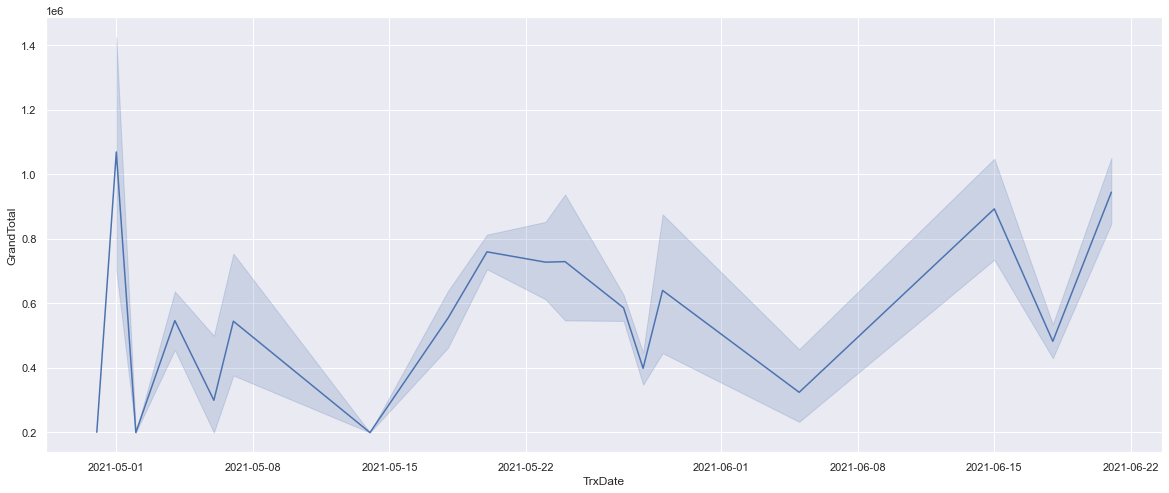

In [40]:
df_clinic['TrxDate']=df_clinic['OrderCreated'].dt.date
plt.figure(figsize=(20,8))
sns.lineplot(data = df_clinic, x = 'TrxDate', y = 'GrandTotal')

## Feature Engineering

In [41]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   object        
 2   Branch            1000 non-null   object        
 3   Package           1000 non-null   object        
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   object        
 6   PromoCode         1000 non-null   object        
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   object        
 13  TrxMonth          1000 non-null   int64         
 14  TrxDay            1000 no

In [42]:
df_clinic['TrxType']=df_clinic['TrxType'].astype('category').cat.codes
df_clinic['PromoCode']=df_clinic['PromoCode'].astype('category').cat.codes
df_clinic['Branch']=df_clinic['Branch'].astype('category').cat.codes
df_clinic['Package']=df_clinic['Package'].astype('category').cat.codes
df_clinic['PatientGender']=df_clinic['PatientGender'].astype('category').cat.codes
df_clinic['MedicalResult']=df_clinic['MedicalResult'].astype('category').cat.codes
#df_clinic['TrxDate']=pd.to_datetime(df_clinic['TrxDate'])

In [43]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TrxNumber         1000 non-null   int64         
 1   TrxType           1000 non-null   int8          
 2   Branch            1000 non-null   int8          
 3   Package           1000 non-null   int8          
 4   PatientBirthDate  1000 non-null   datetime64[ns]
 5   PatientGender     1000 non-null   int8          
 6   PromoCode         1000 non-null   int8          
 7   GrandTotal        1000 non-null   int64         
 8   TotalDiscount     1000 non-null   int64         
 9   AdminFee          1000 non-null   int64         
 10  TotalAmount       1000 non-null   int64         
 11  OrderCreated      1000 non-null   datetime64[ns]
 12  MedicalResult     1000 non-null   int8          
 13  TrxMonth          1000 non-null   int64         
 14  TrxDay            1000 no

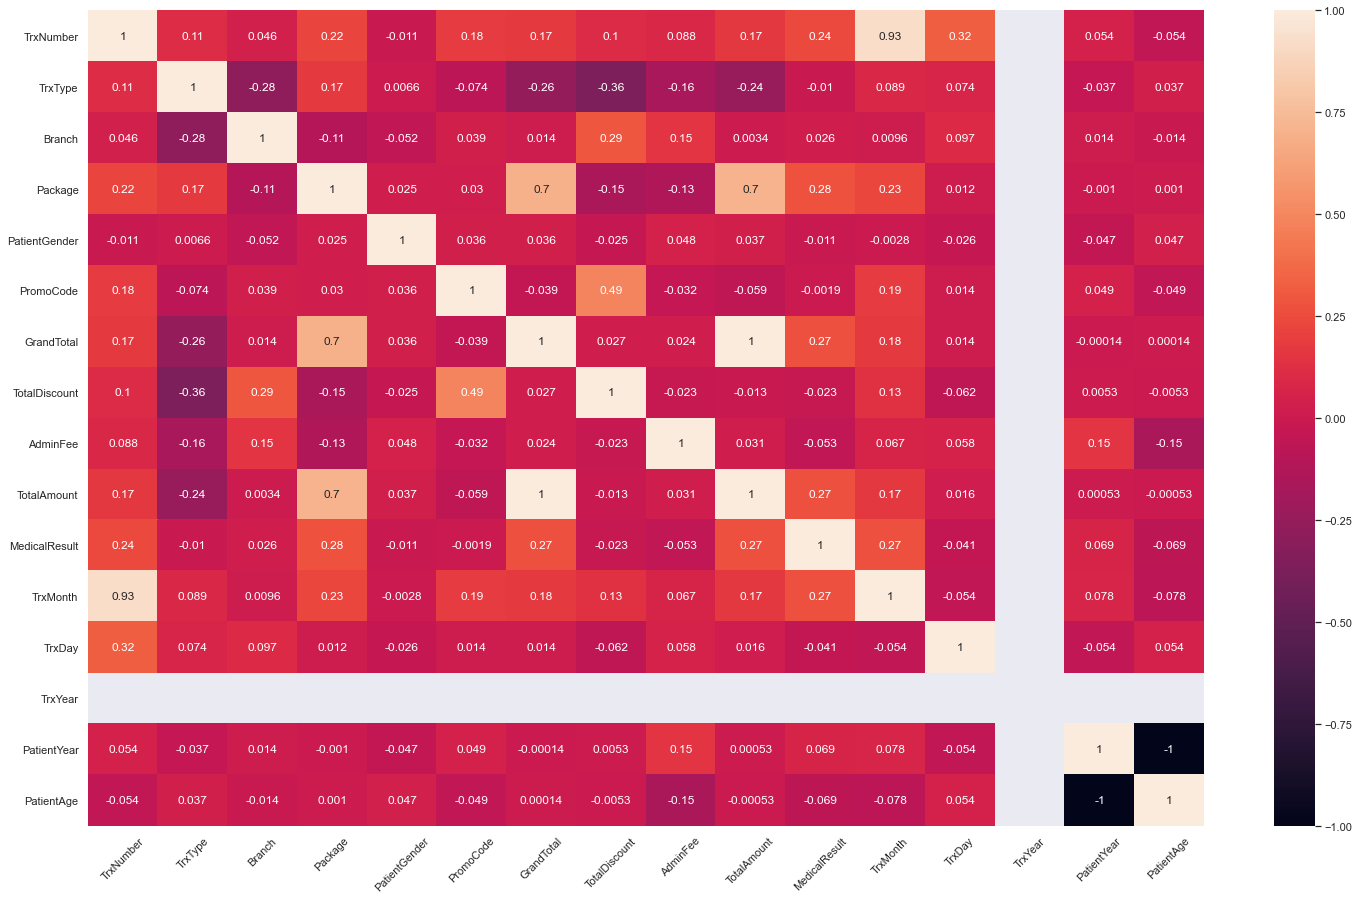

In [44]:
plt.figure(figsize=(25,15))
corr_matrix = df_clinic.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.xticks(rotation=45)
plt.show()

In [45]:
dfcorr = df_clinic.corr(method='pearson')['GrandTotal']
sorted_dfcorr = dfcorr.abs().sort_values(ascending=False)
print(sorted_dfcorr)

GrandTotal       1.000000
TotalAmount      0.999179
Package          0.699015
MedicalResult    0.265830
TrxType          0.255295
TrxMonth         0.176501
TrxNumber        0.173031
PromoCode        0.039333
PatientGender    0.035768
TotalDiscount    0.027408
AdminFee         0.024201
Branch           0.014207
TrxDay           0.013540
PatientYear      0.000139
PatientAge       0.000139
TrxYear               NaN
Name: GrandTotal, dtype: float64


In [46]:
adjusted_df = df_clinic.drop(['TrxNumber',
                              'PromoCode', 
                              'AdminFee',
                              'MedicalResult',
                              'TotalAmount',
                              'TotalDiscount',
                             'OrderCreated',
                             'PatientBirthDate',
                              'TrxDate'],axis=1)
adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TrxType        1000 non-null   int8 
 1   Branch         1000 non-null   int8 
 2   Package        1000 non-null   int8 
 3   PatientGender  1000 non-null   int8 
 4   GrandTotal     1000 non-null   int64
 5   TrxMonth       1000 non-null   int64
 6   TrxDay         1000 non-null   int64
 7   TrxYear        1000 non-null   int64
 8   PatientYear    1000 non-null   int64
 9   PatientAge     1000 non-null   int64
dtypes: int64(6), int8(4)
memory usage: 50.9 KB


## Machine Learning

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [48]:
adjusted_df.info()
adjusted_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TrxType        1000 non-null   int8 
 1   Branch         1000 non-null   int8 
 2   Package        1000 non-null   int8 
 3   PatientGender  1000 non-null   int8 
 4   GrandTotal     1000 non-null   int64
 5   TrxMonth       1000 non-null   int64
 6   TrxDay         1000 non-null   int64
 7   TrxYear        1000 non-null   int64
 8   PatientYear    1000 non-null   int64
 9   PatientAge     1000 non-null   int64
dtypes: int64(6), int8(4)
memory usage: 50.9 KB


,TrxType,Branch,Package,PatientGender,GrandTotal,TrxMonth,TrxDay,TrxYear,PatientYear,PatientAge
0,1,4,1,0,199000,5,4,2021,1997,24
1,1,4,1,0,199000,5,4,2021,1997,24
2,1,4,1,1,199000,5,4,2021,1998,23
3,1,4,1,1,199000,5,4,2021,1998,23
4,1,4,1,0,199000,5,4,2021,1987,34


In [49]:
x = adjusted_df.drop(['GrandTotal'],axis = 1)
y = adjusted_df['GrandTotal']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [50]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
X_train_std = std_scaler.transform(x_train)
X_test_std = std_scaler.transform(x_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
X_train_mm = mm_scaler.transform(x_train)
X_test_mm = mm_scaler.transform(x_test)

# Linear regression

In [51]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

y_predict_test = linreg.predict(x_test)
y_predict_train = linreg.predict(x_train)

acc_linreg_test = linreg.score(x_test, y_predict_test)
acc_linreg_train = linreg.score(x_train, y_predict_train)

print(acc_linreg_train,acc_linreg_test)

1.0 1.0


In [52]:
linreg.coef_

array([-1.23993997e+06, -1.89533110e+04,  9.13236300e+05,  1.40761999e+04,
        5.91309182e+04,  5.25542805e+03, -2.69066457e+11,  5.70160887e+16,
        5.70160887e+16])

In [53]:
linreg.intercept_

-1.1522897148611558e+20

In [54]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.5389027553081351
0.6516876874792168


In [55]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

429504.84702196316

In [56]:
si = (rmse/y_test.mean())*100
si

59.43387582292685

# decision tree Regressor

In [57]:
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

y_predict_test = dt.predict(x_test)
y_predict_train = dt.predict(x_train)

acc_model_test = dt.score(x_test, y_predict_test)
acc_model_train = dt.score(x_train, y_predict_train)

print(acc_model_train,acc_model_test)

1.0 1.0


In [58]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.9614203660266221
0.9925427141965898


In [59]:
mean_absolute_error(y_test,y_predict_test)

46328.30555555556

In [60]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

124236.97180191653

In [61]:
si = (rmse/y_test.mean())*100
si

17.191621482013193

# Random Forest Regressor

In [62]:
rfc = RandomForestRegressor(n_estimators = 300, random_state=42, verbose=1, n_jobs=-1)
#parameter_rfc = {'n_estimators': [500,600,700], 'max_features':["log2"]}
#model_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = parameter_rfc, cv=10, verbose=1, random_state = 42, n_jobs = -1)

rfc.fit(x_train, y_train)
#model_rfc_tuned = model_rfc.best_estimator_

y_predict_test = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

acc_rfc_test = rfc.score(x_test, y_predict_test)
acc_rfc_train = rfc.score(x_train, y_predict_train)

print(acc_rfc_train,acc_rfc_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished


1.0 1.0


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished


In [63]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.9239904585834663
0.9837727003090259


In [64]:
mean_absolute_error(y_test,y_predict_test)

81556.05784746028

In [65]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

174383.68947793075

In [66]:
si = (rmse/y_test.mean())*100
si

24.13080694627221

# Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
adjusted_df['GrandTotal'].value_counts()

398000     217
199000     212
796000     164
597000     162
995000      60
1194000     36
3596000     36
1050000     27
899000      21
2300000     16
1798000     16
2697000     15
1850000      9
1500000      4
350000       3
200000       1
1150000      1
Name: GrandTotal, dtype: int64

In [69]:
ros = RandomOverSampler(sampling_strategy='not majority')
x_adjusted,y_adjusted = ros.fit_resample(x,y)

y_adjusted.value_counts()

398000     217
199000     217
3596000    217
995000     217
200000     217
1150000    217
597000     217
1850000    217
2300000    217
1500000    217
1194000    217
899000     217
350000     217
2697000    217
1050000    217
796000     217
1798000    217
Name: GrandTotal, dtype: int64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_adjusted,y_adjusted, test_size = 0.20, random_state = 42)

std_scaler = StandardScaler()
std_scaler.fit(x_train)
X_train_std = std_scaler.transform(x_train)
X_test_std = std_scaler.transform(x_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
X_train_mm = mm_scaler.transform(x_train)
X_test_mm = mm_scaler.transform(x_test)

# resampled linreg

In [71]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

y_predict_test = linreg.predict(x_test)
y_predict_train = linreg.predict(x_train)

acc_linreg_test = linreg.score(x_test, y_predict_test)
acc_linreg_train = linreg.score(x_train, y_predict_train)

print(acc_linreg_train,acc_linreg_test)

1.0 1.0


In [72]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.54490127123738
0.5237434520940822


In [73]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

606855.3497466241

In [74]:
si = (rmse/y_test.mean())*100
si

49.385600908738994

# resampled decision tree

In [75]:
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

y_predict_test = dt.predict(x_test)
y_predict_train = dt.predict(x_train)

acc_model_test = dt.score(x_test, y_predict_test)
acc_model_train = dt.score(x_train, y_predict_train)

#print(acc_model_train,acc_model_test)

In [76]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.9948971241869164
0.9980475712288631


In [77]:
mean_absolute_error(y_test,y_predict_test)

13158.834478131463

In [78]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

64259.87452835292

In [79]:
si = (rmse/y_test.mean())*100
si

5.229438150669502

# resampled random forest

In [80]:
rfc = RandomForestRegressor(n_estimators = 300, random_state=42, verbose=1, n_jobs=-1)
#parameter_rfc = {'n_estimators': [500,600,700], 'max_features':["log2"]}
#model_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = parameter_rfc, cv=10, verbose=1, random_state = 42, n_jobs = -1)

rfc.fit(x_train, y_train)
#model_rfc_tuned = model_rfc.best_estimator_

y_predict_test = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

acc_rfc_test = rfc.score(x_test, y_predict_test)
acc_rfc_train = rfc.score(x_train, y_predict_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Do

In [81]:
print(r2_score(y_test,y_predict_test))
print(r2_score(y_train,y_predict_train))

0.9955463884905912
0.9977133057900688


In [82]:
mean_absolute_error(y_test,y_predict_test)

17096.413560875542

In [83]:
rmse = mean_squared_error(y_test,y_predict_test, squared = False)
rmse

60032.791585117586

In [84]:
si = (rmse/y_test.mean())*100
si

4.8854401430225085

In [85]:
importances = rfc.feature_importances_
importances

array([0.02420236, 0.11897154, 0.48127946, 0.00876946, 0.0547456 ,
       0.16005625, 0.        , 0.07585915, 0.07611619])

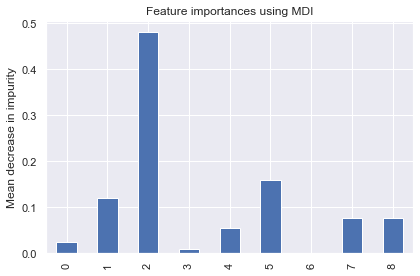

In [86]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [87]:
x_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TrxType        3689 non-null   int8 
 1   Branch         3689 non-null   int8 
 2   Package        3689 non-null   int8 
 3   PatientGender  3689 non-null   int8 
 4   TrxMonth       3689 non-null   int64
 5   TrxDay         3689 non-null   int64
 6   TrxYear        3689 non-null   int64
 7   PatientYear    3689 non-null   int64
 8   PatientAge     3689 non-null   int64
dtypes: int64(5), int8(4)
memory usage: 158.6 KB
